In [1]:
#import modules

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
import spacy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns



In [2]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [3]:
#set random seed
np.random.seed(42)

In [ ]:
#load datasets
cleaned_gender_df = pd.read_csv('cleaned_gender_df.csv')
cleaned_nationality_df = pd.read_csv('cleaned_nationality_df.csv')


In [ ]:
cleaned_gender_df[cleaned_gender_df['author_ID'].str.contains('t2_4jnzekzd', case=False, na=False)]

,author_ID,post,female,cleaned_post
44779,t2_4jnzekzd,What happens to bi people? Actually every line...,0,happen bi people actually line kid name potato...
44780,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44781,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44782,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44783,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44784,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44785,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44786,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44787,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...
44788,t2_4jnzekzd,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...,0,yiff yiff yiff yiff yiff yiff yiff yiff yiff y...


In [ ]:
cleaned_gender_df = cleaned_gender_df[cleaned_gender_df['author_ID'] != 't2_4jnzekzd']

In [ ]:
cleaned_gender_df[cleaned_gender_df['author_ID'] == 't2_8ecqs5dt']

,author_ID,post,female,cleaned_post
3572,t2_8ecqs5dt,Hip slots were one of the first things I disco...,0,hip slot thing discover play game blame people...
3573,t2_8ecqs5dt,new dog figglebottom I was on a train and I op...,0,new dog figglebottom train open start furiousl...
3574,t2_8ecqs5dt,idk One piece fans when they see an anime that...,0,idk piece fan anime sexualize woman 2 second p...
3575,t2_8ecqs5dt,lefts agenda. A creative decision is not alway...,0,lefts agenda creative decision good decision g...
3576,t2_8ecqs5dt,"is Heisenbones is getting funnier, it’s other ...",0,heisenbone get funny variation l4d2 dev commen...
3577,t2_8ecqs5dt,"of LGBT, making flags and doing pride parades ...",0,lgbt make flag pride parade will normalize xen...
3578,t2_8ecqs5dt,I like pyro combos that aren’t completely stup...,0,like pyro combo completely stupid nostalgia ra...
3579,t2_8ecqs5dt,cum cum cum cum cum cum cum cum cum cum cum cu...,0,cum cum cum cum cum cum cum cum cum cum cum cu...
3580,t2_8ecqs5dt,a good fucking warpaint Idk if this person sho...,0,good fucking warpaint idk person reddit lmfao ...
3581,t2_8ecqs5dt,"2 He likes fish sticks Pebblethrow, also he’s ...",0,2 like fish stick pebblethrow nazi imposter so...


In [ ]:
cleaned_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89215 entries, 0 to 89271
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author_ID     89215 non-null  object
 1   post          89215 non-null  object
 2   female        89215 non-null  int64 
 3   cleaned_post  89215 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


In [ ]:
filtered_nationality_df.describe()

,author_ID,post,nationality,cleaned_post
count,165089,165089,165089,165089
unique,7426,165050,60,165049
top,t2_dj2ua,cunt cunt cunt Cunt cunt cunt cunt cunt Cunt c...,Germany,cunt cunt cunt cunt cunt cunt cunt cunt cunt c...
freq,1031,16,21313,16


In [ ]:
import re

def contains_multiple_occurrences(text, word, min_count=2):
    count = len(re.findall(word, text, re.IGNORECASE))
    return count >= min_count

# Test the function
print(contains_multiple_occurrences("This is a test with cum and cum again", "cum"))


True


In [ ]:
cleaned_nationality_filtered = pd.read_csv('cleaned_nationality_filtered.csv')

In [ ]:
cleaned_gender_filtered = pd.read_csv('cleaned_gender_filtered.csv')

In [ ]:
cleaned_nationality_filtered.to_csv('cleaned_nationality_filtered.csv', index=False)


In [ ]:
cleaned_gender_filtered = cleaned_gender_df[~cleaned_gender_df['cleaned_post'].apply(lambda x: contains_multiple_occurrences(x, 'cum') or contains_multiple_occurrences(x, 'cunt') or contains_multiple_occurrences(x, 'cock'))]


In [ ]:
cleaned_gender_filtered.to_csv('cleaned_gender_filtered.csv', index=False)


In [ ]:

cleaned_gender_df.isnull().sum()

author_ID       0
post            0
female          0
cleaned_post    0
dtype: int64

In [4]:
#load datasets
cleaned_gender_filtered = pd.read_csv('cleaned_gender_filtered.csv')
cleaned_nationality_filtered = pd.read_csv('cleaned_nationality_filtered.csv')

In [ ]:
cleaned_nationality_filtered.describe()

,author_ID,post,nationality,cleaned_post
count,153328,153328,153328,153328
unique,7338,153323,60,153322
top,t2_dj2ua,cock cock cock cock cock cock cock cock cock c...,Germany,cock cock cock cock cock cock cock cock cock c...
freq,997,5,20182,5


In [ ]:
cleaned_nationality_filtered = cleaned_nationality_df[~cleaned_nationality_df['cleaned_post'].apply(lambda x: contains_multiple_occurrences(x, 'cock'))]


In [ ]:
cleaned_nationality_filtered = pd.read_csv('cleaned_nationality_filtered.csv')

In [ ]:
cleaned_gender_filtered.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83158 entries, 0 to 83157
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author_ID     83158 non-null  object
 1   post          83158 non-null  object
 2   female        83158 non-null  int64 
 3   cleaned_post  83158 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.5+ MB


In [ ]:
cleaned_nationality_filtered.describe()

,Unnamed: 0
count,164037.000000
mean,82525.168712
std,47689.304452
min,0.000000
25%,41217.000000
50%,82492.000000
75%,123806.000000
max,165233.000000


In [ ]:
cleaned_nationality_filtered.head()

,Unnamed: 0,author_ID,post,nationality,cleaned_post
0,0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland,legally bind depend rank well play good play b...
1,1,t2_10uons,games won to games played. Games played is cal...,Finland,game win game play game play calculate compare...
2,2,t2_10uons,So with that logic USA is a very shitty place ...,Finland,logic usa shitty place live ~1 shooting millio...
3,3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland,refer add lot ea activision etc release game y...
4,4,t2_10uons,get another role than support Lel people here ...,Finland,role support lel people think 23 huge number w...


In [ ]:
#rename column name
#gender_df.rename(columns={'auhtor_ID':'author_ID'}, inplace=True)
#nationality_df.rename(columns={'auhtor_ID':'author_ID'}, inplace=True)

In [ ]:
cleaned_gender_df.describe()

,female
count,89272.000000
mean,0.477709
std,0.499506
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Data Preprocessing (cleaning)

In [ ]:
#Precompile the regex pattern
whitespace_re = re.compile(r'\s+')

#clean_text function
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def clean_text(text):
    text = whitespace_re.sub(' ', text)
    text = text.lower()
    return ' '.join([token.lemma_ for token in nlp(text) if not token.is_stop and not token.is_punct and not token.is_space])



In [ ]:
# Batch Text Processing
batch_size = 10000  #
for start in range(0, len(gender_df), batch_size):
    end = min(start + batch_size, len(gender_df))
    gender_df.loc[start:end, 'cleaned_post'] = gender_df.loc[start:end, 'post'].apply(clean_text)

In [ ]:
#save the cleaned version to prevent headache
gender_df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_gender_df.csv', index=False)


In [ ]:
# Batch Text Processing
batch_size = 10000
for start in range(0, len(nationality_df), batch_size):
    end = min(start + batch_size, len(nationality_df))
    nationality_df.loc[start:end, 'cleaned_post'] = nationality_df.loc[start:end, 'post'].apply(clean_text)

In [ ]:
#save the cleaned version to prevent headache
nationality_df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_nationality_df.csv', index=False)

In [ ]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89272 entries, 0 to 89271
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author_ID     89272 non-null  object
 1   post          89272 non-null  object
 2   female        89272 non-null  int64 
 3   cleaned_post  89272 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [ ]:
cleaned_nationality_df = pd.read_csv('cleaned_nationality_df.csv')

In [ ]:
cleaned_gender_df.info()
#cleaned_nationality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89272 entries, 0 to 89271
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author_ID     89272 non-null  object
 1   post          89272 non-null  object
 2   female        89272 non-null  int64 
 3   cleaned_post  89272 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [ ]:
cleaned_gender_filtered[cleaned_gender_filtered['cleaned_post'].str.contains('', case=False, na=False)]

,author_ID,post,female,cleaned_post


In [ ]:
#before eda, lets check if there are other words repeating

def is_repeating_word(text):
    if not text or pd.isna(text):
        return False
    words = text.split()
    return len(set(words)) == 1


In [ ]:
cleaned_nationality_filtered['is_repeating'] = cleaned_nationality_filtered['cleaned_post'].apply(is_repeating_word)


In [ ]:
repeating_posts = cleaned_nationality_filtered[cleaned_nationality_filtered['is_repeating']]
repeating_posts

,Unnamed: 0,author_ID,post,nationality,cleaned_post,is_repeating
36305,36486,t2_43mndzop,Fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck fuck f...,Italy,fuck fuck fuck fuck fuck fuck fuck fuck fuck f...,True
36306,36487,t2_43mndzop,Fuck Fuck Fuck Fuck Fuck Fuck Fuck Fuck fuck f...,Italy,fuck fuck fuck fuck fuck fuck fuck fuck fuck f...,True
41559,41768,t2_17hy0m,piss piss piss piss Piss piss piss piss piss P...,USA,piss piss piss piss piss piss piss piss piss p...,True
41563,41772,t2_17hy0m,Cum Cum Cum Cum Cum Cum Cum Cum Cum Cum Cum Cu...,USA,cum cum cum cum cum cum cum cum cum cum cum cu...,True
78175,78615,t2_a01olqgn,cum cum cum cum cum cum cum cum cum cum cum cu...,Ukraine,cum cum cum cum cum cum cum cum cum cum cum cu...,True
...,...,...,...,...,...,...
162863,164052,t2_2m5smgve,cum cum cum cum cum cum cum cum cum cum cum cu...,Poland,cum cum cum cum cum cum cum cum cum cum cum cu...,True
163539,164734,t2_5hsvspwy,cum cum cum cum cum cum cum cum cum cum cum cu...,Poland,cum cum cum cum cum cum cum cum cum cum cum cu...,True
163540,164735,t2_5hsvspwy,cum cum cum cum cum cum cum cum cum cum cum cu...,Poland,cum cum cum cum cum cum cum cum cum cum cum cu...,True
163541,164736,t2_5hsvspwy,cum cum cum cum cum cum cum cum cum cum cum cu...,Poland,cum cum cum cum cum cum cum cum cum cum cum cu...,True


In [ ]:
cleaned_nationality_filtered = cleaned_nationality_filtered[~cleaned_nationality_filtered ['cleaned_post'].apply(is_repeating_word)]


In [ ]:
cleaned_nationality_filtered.to_csv('cleaned_nationality_filtered.csv')

In [ ]:
cleaned_gender_filtered['is_repeating'] = cleaned_gender_filtered['cleaned_post'].apply(is_repeating_word)


In [ ]:
cleaned_gender_filtered.to_csv('cleaned_gender_filtered.csv')

In [4]:
cleaned_gender_filtered = pd.read_csv('cleaned_gender_filtered.csv')

In [5]:
cleaned_nationality_filtered = pd.read_csv('cleaned_nationality_filtered.csv')

Exploratory Data Analysis

In [ ]:
# Count the occurrences of each gender
gender_counts = cleaned_gender_filtered['female'].value_counts()

# Calculate the percentage of each gender
gender_percentage = cleaned_gender_filtered['female'].value_counts(normalize=True) * 100

# Create a DataFrame to display counts and percentages side by side
gender_distribution = pd.DataFrame({'Count': gender_counts, 'Percentage': gender_percentage})


print(gender_distribution)


   Count  Percentage
0  42887   51.572909
1  40271   48.427091


In [ ]:
# Count the occurrences of each gender
nationality_counts = cleaned_nationality_filtered['nationality'].value_counts()

# Calculate the percentage of each gender
nationality_percentage = cleaned_nationality_filtered['nationality'].value_counts(normalize=True) * 100

# Create a DataFrame to display counts and percentages side by side
nationality_distribution = pd.DataFrame({'Count': nationality_counts, 'Percentage': nationality_percentage})


print(nationality_distribution)

                        Count  Percentage
Germany                 21187   12.924419
USA                     20376   12.429696
United Kingdom          18251   11.133411
The Netherlands         10899    6.648570
France                   6366    3.883365
Sweden                   5828    3.555176
Finland                  5597    3.414262
Poland                   5304    3.235527
Italy                    5025    3.065333
Ireland                  4473    2.728604
Spain                    4289    2.616361
Denmark                  4062    2.477887
Romania                  3656    2.230220
Canada                   3610    2.202159
Norway                   3595    2.193009
Belgium                  3305    2.016104
Portugal                 3153    1.923382
Turkey                   2716    1.656805
Greece                   2620    1.598243
Croatia                  2246    1.370097
Czech Republic           2210    1.348136
Austria                  2168    1.322516
Serbia                   2166    1

In [ ]:
# Numerical summary
total_posts = len(cleaned_nationality_filtered)

print(f"Total number of posts: {total_posts}")


Total number of posts: 164037


In [ ]:
class_counts = cleaned_nationality_filtered['nationality'].value_counts()
print(class_counts)

Germany                   21203
USA                       20380
United Kingdom            18251
The Netherlands           10911
France                     6366
Sweden                     5862
Finland                    5597
Poland                     5315
Italy                      5027
Ireland                    4473
Spain                      4289
Denmark                    4062
Romania                    3656
Canada                     3610
Norway                     3600
Belgium                    3305
Portugal                   3153
Turkey                     2716
Greece                     2620
Croatia                    2256
Czech Republic             2210
Austria                    2168
Serbia                     2166
Hungary                    2085
Russia                     1871
Switzerland                1564
Slovenia                   1503
Bulgaria                   1373
Estonia                    1284
Ukraine                    1269
Lithuania                   995
Australi

In [6]:
class_counts = cleaned_gender_filtered['female'].value_counts()
print(class_counts)


0    42887
1    40271
Name: female, dtype: int64


Total number of posts: 83158
Number of posts by females: 40271
Number of posts by males: 42887


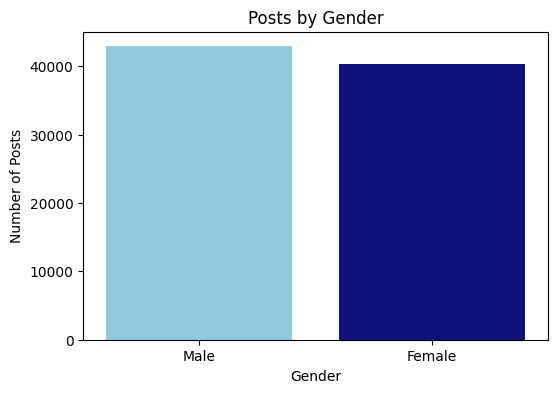

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical summary
total_posts = len(cleaned_gender_filtered)
num_female_posts = cleaned_gender_filtered['female'].sum()
num_male_posts = total_posts - num_female_posts

print(f"Total number of posts: {total_posts}")
print(f"Number of posts by females: {num_female_posts}")
print(f"Number of posts by males: {num_male_posts}")

# Visual representation
gender_counts = cleaned_gender_filtered['female'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, palette=['skyblue', 'darkblue'], y=gender_counts.values)
plt.title('Posts by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Number of Posts')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical summary
total_posts = len(cleaned_nationality_filtered)
num_nationality_posts = cleaned_nationality_filtered['nationality'].sum()
num_male_posts = total_posts - num_female_posts


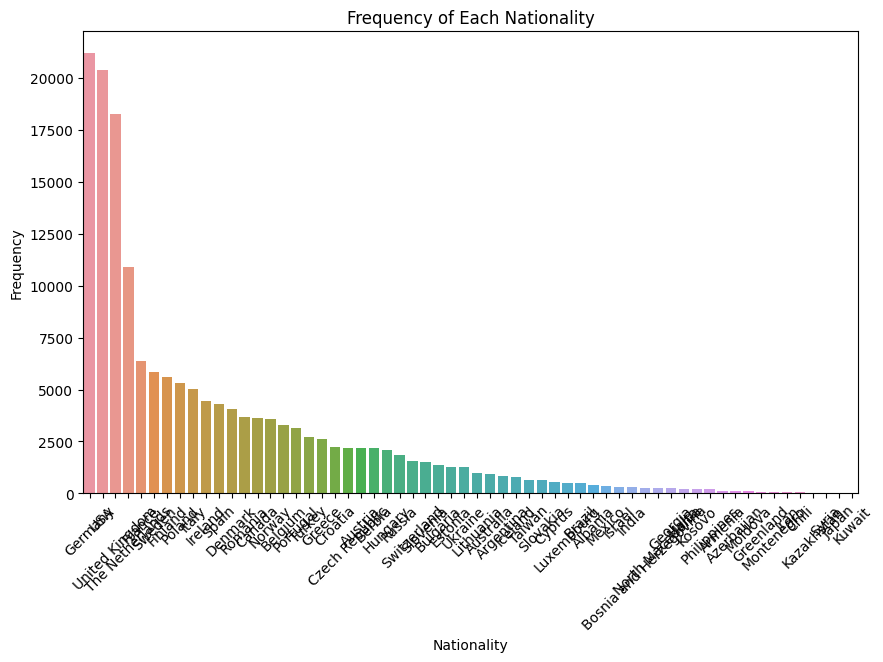

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each nationality
nationality_counts = cleaned_nationality_filtered['nationality'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values)
plt.xticks(rotation=45)
plt.title('Frequency of Each Nationality')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.show()


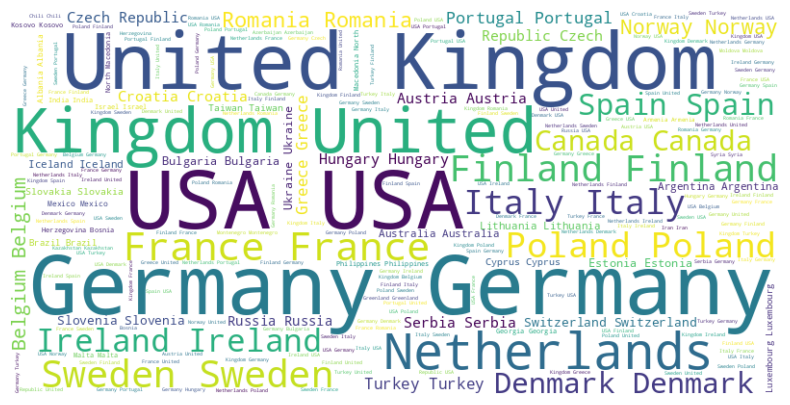

In [6]:
from wordcloud import WordCloud

# Create a text string for the word cloud
text = ' '.join(cleaned_nationality_filtered['nationality'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


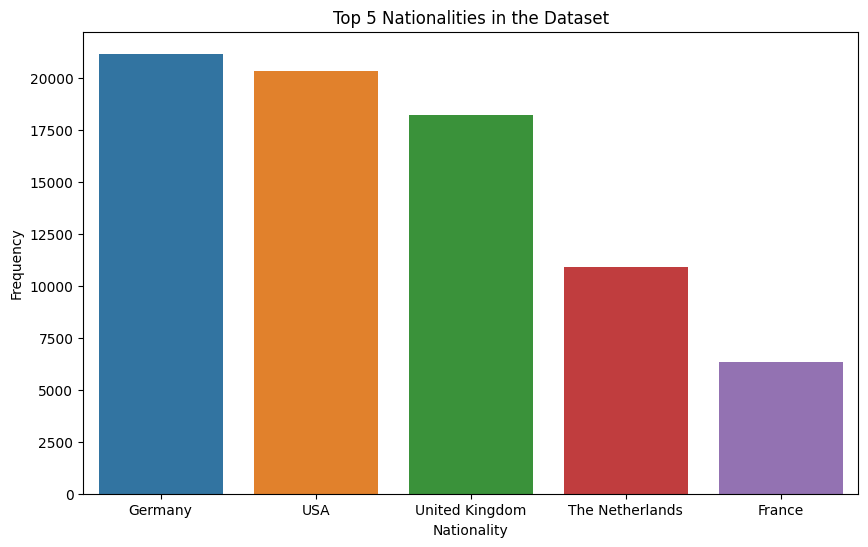

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 5 nationalities
top_nationalities = cleaned_nationality_filtered['nationality'].value_counts().head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values)
plt.title('Top 5 Nationalities in the Dataset')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.show()


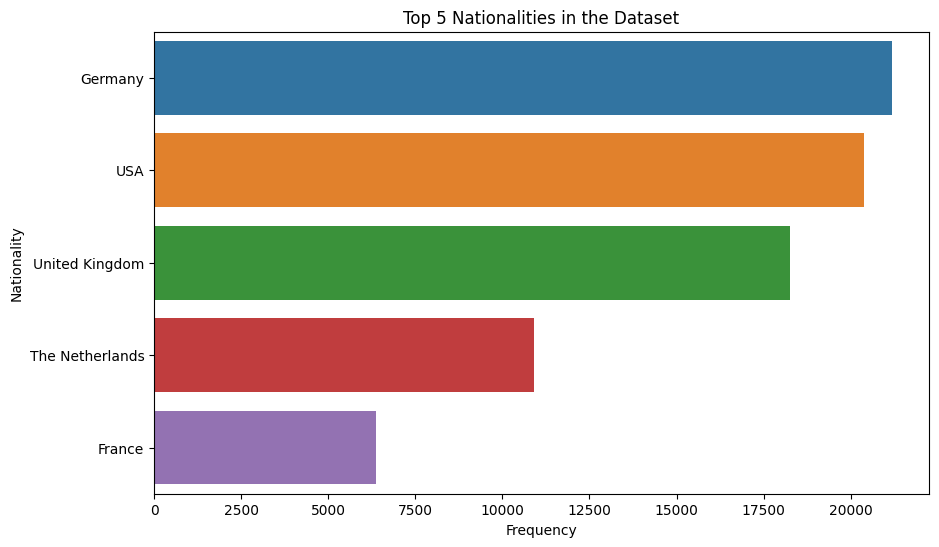

In [15]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index)
plt.title('Top 5 Nationalities in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Nationality')
plt.show()


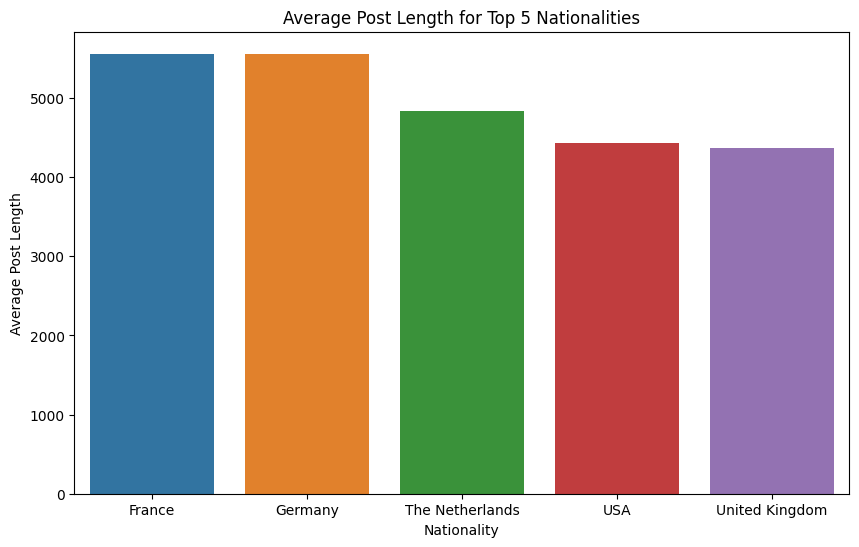

In [16]:

# Step 1: Identify the top 5 nationalities
top_nationalities = cleaned_nationality_filtered['nationality'].value_counts().head(5).index

# Step 2: Filter the DataFrame to include only the top 5 nationalities and calculate average post length
top_nationalities_data = cleaned_nationality_filtered[cleaned_nationality_filtered['nationality'].isin(top_nationalities)]
average_post_length = top_nationalities_data.groupby('nationality')['cleaned_post'].apply(lambda x: x.str.len().mean())

# Step 3: Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_post_length.index, y=average_post_length.values)
plt.title('Average Post Length for Top 5 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Average Post Length')
plt.show()


In [10]:
!pip install squarify

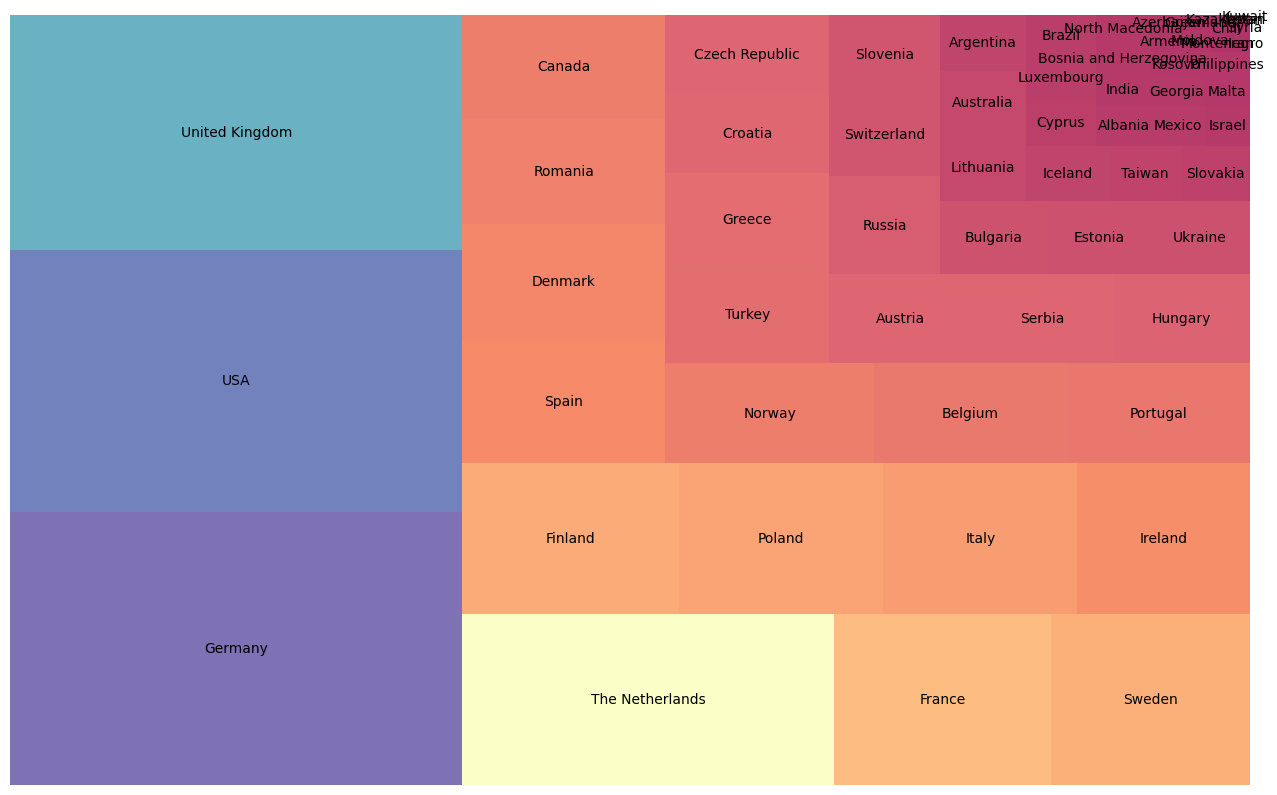

In [13]:
import squarify

# Create a color palette
cmap = plt.cm.Spectral
mini=min(nationality_counts.values)
maxi=max(nationality_counts.values)
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in nationality_counts.values]

# Plot
plt.figure(figsize=(16, 10))
squarify.plot(sizes=nationality_counts.values, label=nationality_counts.index, alpha=0.8, color=colors)
plt.axis('off')
plt.show()


In [ ]:
from collections import Counter

# Split data by gender
female_posts = cleaned_gender_filtered[cleaned_gender_filtered['female'] == 1]['cleaned_post']
male_posts = cleaned_gender_df[cleaned_gender_df['female'] == 0]['cleaned_post']

# Flatten the list of words
female_words = [word for post in female_posts for word in post.split()]
male_words = [word for post in male_posts for word in post.split()]

# Count words
female_word_counts = Counter(female_words)
male_word_counts = Counter(male_words)

# Get most common words
most_common_female = female_word_counts.most_common(10)
most_common_male = male_word_counts.most_common(10)

# Print most common words
print("Most common words among female posts:", most_common_female)
print("Most common words among male posts:", most_common_male)


Most common words among female posts: [('like', 342084), ('think', 212597), ('people', 194766), ('know', 190245), ('time', 185837), ('want', 176416), ('good', 163956), ('go', 157859), ('get', 157143), ('thing', 145508)]
Most common words among male posts: [('like', 355540), ('people', 220720), ('think', 212506), ('time', 191712), ('good', 190962), ('know', 181218), ('get', 173414), ('want', 166121), ('go', 166029), ('thing', 150150)]


In [ ]:
# Add a column for post length
cleaned_gender_filtered['post_length'] = cleaned_gender_filtered['cleaned_post'].apply(len)

# Plotting
sns.boxplot(x='female', y='post_length', data=cleaned_gender_filtered)
plt.title('Average Post Length by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Post Length')
plt.show()


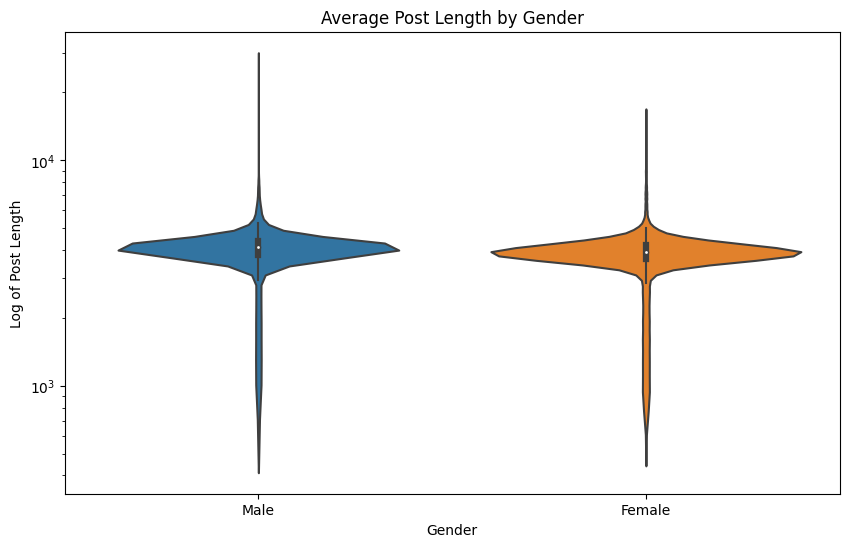

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a column for post length
cleaned_gender_filtered['post_length'] = cleaned_gender_filtered['cleaned_post'].apply(len)

# Plotting with a violin plot and logarithmic scale
plt.figure(figsize=(10, 6))  # Increase plot size
sns.violinplot(x='female', y='post_length', data=cleaned_gender_filtered)
plt.yscale('log')  # Apply logarithmic scale
plt.title('Average Post Length by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Log of Post Length')
plt.show()


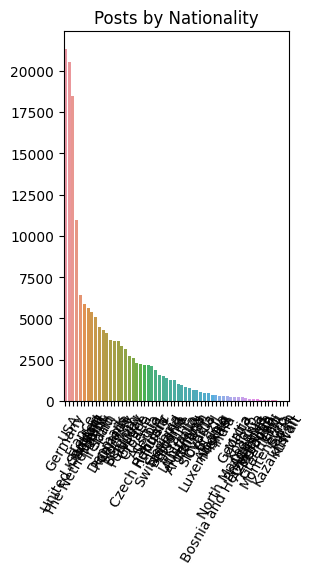

In [ ]:
# Count posts by nationality
nationality_counts = cleaned_nationality_df['nationality'].value_counts()

# Plotting
plt.subplot(1, 2, 2)
sns.barplot(x=nationality_counts.index, y=nationality_counts.values)
plt.title('Posts by Nationality')
plt.xticks(rotation=60)
plt.show()


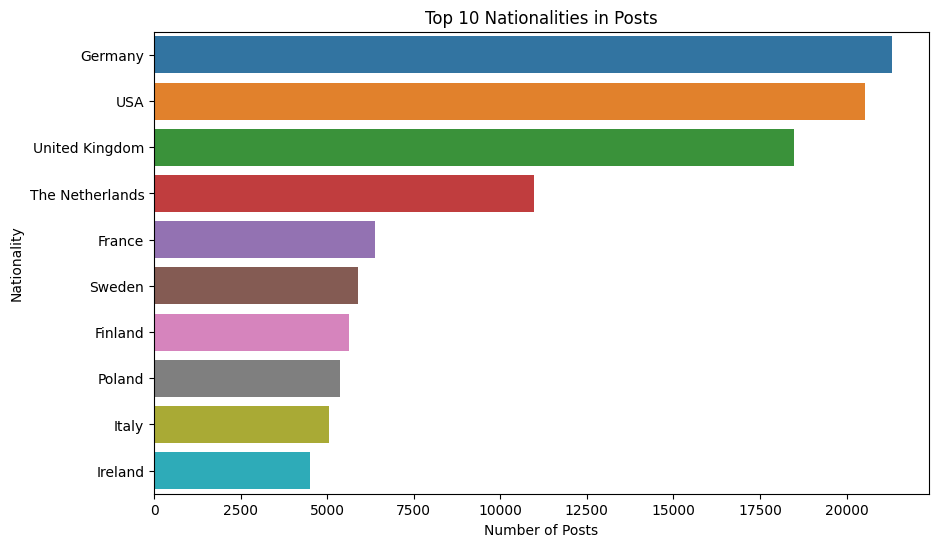

In [ ]:
# Define the number of top nationalities to display
top_n = 10

# Calculate post counts for each nationality
nationality_counts = cleaned_nationality_df['nationality'].value_counts()

# Filter for top N nationalities
top_nationalities = nationality_counts.head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index)
plt.title(f'Top {top_n} Nationalities in Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Nationality')
plt.show()


In [ ]:
# Add a column for post length
cleaned_gender_df['post_length'] = cleaned_gender_df['post'].apply(len)
cleaned_nationality_df['post_length'] = cleaned_nationality_df['post'].apply(len)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='post_length', data=cleaned_gender_df)
plt.title('Average Post Length by Gender')

plt.subplot(1, 2, 2)
sns.boxplot(x='nationality', y='post_length', data=cleaned_nationality_df)
plt.title('Average Post Length by Nationality')
plt.xticks(rotation=45)
plt.show()


Logistic Regression model voor gender

In [37]:
# Feature extraction using TF-IDF
# You can adjust the number of features and other parameters to improve your models performance
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))

In [38]:
# Apply TF-IDF to the cleaned posts
X = tfidf_vectorizer.fit_transform(cleaned_gender_filtered['cleaned_post'])
y = cleaned_gender_filtered['female']

In [39]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Initialize and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [41]:
# Predictions
y_pred = lr_model.predict(X_test)

In [42]:
# Getting predicted probabilities
y_pred_prob = lr_model.predict_proba(X_test)

In [43]:
# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8698292448292448
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      8597
           1       0.87      0.86      0.86      8035

    accuracy                           0.87     16632
   macro avg       0.87      0.87      0.87     16632
weighted avg       0.87      0.87      0.87     16632



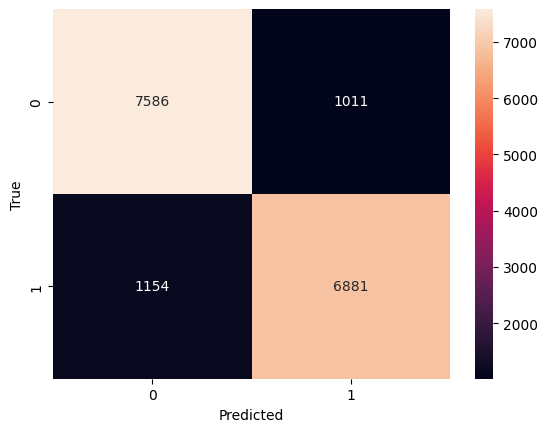

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])  # y_pred_prob is the probability of the positive class
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print("Cross-validated scores:", scores)


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:, 1])
average_precision = average_precision_score(y_test, y_pred_prob[:, 1])

plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
plt.show()


In [46]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_importances = lr_model.coef_[0]
sorted_features = sorted(zip(feature_importances, feature_names), reverse=True)
print("Most important features for prediction:")
for importance, feature in sorted_features[:25]:
    print(f'{feature}: {importance}')

Most important features for prediction:
husband: 10.680071341409509
boyfriend: 6.288639019838757
date guy: 6.017222267438358
omg: 5.525120549908866
baby: 5.184304916506585
lesbian: 5.143012445964749
bf: 4.587476790472739
stamp: 4.406253403945899
hubby: 4.070269588517158
period: 3.957653635830036
super: 3.914770782439869
romance: 3.854696197304127
gross: 3.7339319656695107
makeup: 3.7325004407318048
bra: 3.708810557643715
absolutely: 3.68584085468266
okay: 3.6683867184599337
edit add: 3.6361002591266685
female: 3.6031923820648992
fabric: 3.5892267327164924
cute: 3.565202565517197
toddler: 3.5254237332218183
definitely: 3.4324026042882765
eta: 3.4016371117745403
leftist: 3.365047821573439


In [64]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_importances = lr_model.coef_[0]

# For the male class, we are interested in the most negative coefficients
# as they are more indicative of the '0' class in binary classification
sorted_features_for_male = sorted(zip(feature_importances, feature_names))
print("Most important features for prediction of male class:")
for importance, feature in sorted_features_for_male[:25]:  # Top 20 features
    print(f'{feature}: {importance}')


Most important features for prediction of male class:
wife: -11.047760939406329
gay: -6.557041157217312
bro: -5.460739792050562
gf: -4.854811602346218
problem: -4.336731299927329
simple: -3.9021402353249086
beer: -3.681314525943454
female friend: -3.6672477530008125
nice: -3.6225814743637232
ex wife: -3.617452688891112
date woman: -3.5256806436960613
father: -3.4350272658467276
girlfriend: -3.3661859626341983
buddy: -3.3165047925086717
guitar: -3.2846779568568873
probably: -3.267752844809517
fantastic: -3.2641179099082707
gay man: -3.224325371035219
engineer: -3.1459469373355846
guess: -3.130713995256845
australia: -3.0018303213615107
success: -2.8533982971005973
male: -2.837362177078863
billion: -2.8341221137021715
dude: -2.8122462739450977


-----------------------------------
naive bayes

In [54]:
# Initialize the Multinomial Naive Bayes classifier
mnb_model = MultinomialNB()

In [55]:
# Train the model
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [56]:
# Get feature names, assuming you have a vectorizer like CountVectorizer or TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

In [57]:
# Get log probabilities
log_prob = mnb_model.feature_log_prob_

In [58]:
# Exponentiate to get actual probabilities
prob = np.exp(log_prob)

In [63]:
# For each class, print the top N words
top_n = 50
for i, class_prob in enumerate(prob):
    top_features = class_prob.argsort()[-top_n:][::-1]
    gender = 'Female' if i == 1 else 'Male'
    print(f"Top {top_n} words for {gender}:")
    print([feature_names[j] for j in top_features])

Top 50 words for Male:
['like', 'people', 'think', 'good', 'time', 'know', 'want', 'thing', 'work', 'year', 'look', 'need', 'way', 'game', 'say', 'gt', 'feel', 'try', 'man', 'day', 'guy', 'play', 'right', 'come', 'woman', 'love', 'lot', 'life', 'tell', 'mean', 'bad', 'lol', 'use', 'start', 'friend', 'url', 'fuck', 'point', 'shit', 'date', 'make', 'sure', 'kid', 'yeah', 'long', 'ask', 'probably', 'actually', 'talk', 'great']
Top 50 words for Female:
['like', 'think', 'people', 'know', 'time', 'want', 'feel', 'good', 'thing', 'work', 'year', 'need', 'love', 'look', 'try', 'kid', 'say', 'day', 'woman', 'way', 'tell', 'thank', 'friend', 'lot', 'life', 'help', 'lol', 'man', 'relationship', 'child', 'date', 'come', 'right', 'ask', 'husband', 'start', 'person', 'family', 'talk', 'live', 'make', 'bad', 'parent', 'guy', 'mean', 'old', 'dog', 'sure', 'long', 'week']


In [61]:
# Predictions
y_pred_mnb = mnb_model.predict(X_test)

In [62]:
# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred_mnb)}')
print(classification_report(y_test, y_pred_mnb))


Accuracy: 0.7806637806637806
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      8597
           1       0.76      0.80      0.78      8035

    accuracy                           0.78     16632
   macro avg       0.78      0.78      0.78     16632
weighted avg       0.78      0.78      0.78     16632

